<a href="https://colab.research.google.com/github/ed-chin-git/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

### create data by hand and plot it

In [41]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# set up some fake data similar to above chart
fake = pd.Series( [38,3,2,1,2,4,6,5,5,33] ,index=range(1,11) )

In [43]:
plt.style.available

['seaborn-muted',
 'seaborn-ticks',
 'seaborn-deep',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-darkgrid',
 '_classic_test',
 'seaborn-colorblind',
 'seaborn-talk',
 'dark_background',
 'seaborn-bright',
 'bmh',
 'seaborn-white',
 'grayscale',
 'fast',
 'seaborn-pastel',
 'classic',
 'Solarize_Light2',
 'seaborn-whitegrid',
 'seaborn',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-dark',
 'seaborn-dark-palette',
 'ggplot']

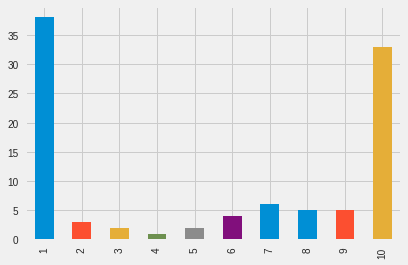

In [44]:
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-white')

fake.plot.bar();

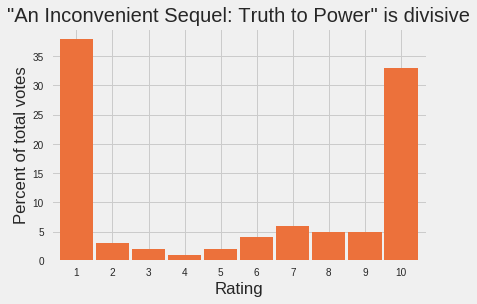

In [45]:
#  create an object handle for the chart
#  this will allow setting of Chart Obj parameters
ax = fake.plot.bar(color='#EC713B', width=0.92)

ax.tick_params(labelrotation=0) # rotate the x labels

#  define the title 
#ax.set_title('Xxx')
ax.set(title='"An Inconvenient Sequel: Truth to Power" is divisive', 
       xlabel='Rating', 
       ylabel='Percent of total votes');

In [46]:
display(example)

### Read thru the actual data and plot it

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [48]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [49]:

#  don't skip any columns!!!
pd.options.display.max_columns=None
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [50]:
#  Vertically show  all columns/features of 1 row/instance
df.sample(1).T

,6638
timestamp,2017-08-01 04:00:02.602868
respondents,115
category,Females
link,http://www.imdb.com/title/tt6322922/ratings-fe...
average,6.6
mean,7.5
median,10
1_votes,23
2_votes,2
3_votes,3


In [51]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-28 17:00:02.813791
freq                               1
Name: timestamp, dtype: object

In [0]:
#  timestamp not being treated as a datetime
#  convert timestamp data to datetime format
df.timestamp=pd.to_datetime(df.timestamp)

In [0]:
#  set the index to timestamp instead of count_integers
df.set_index('timestamp', inplace=True)

In [54]:
df

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2
2017-07-17 12:28:33.970009,108,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.2,6.2,9,37,0,3,1,1,3,6,2,6,49,34.3,0.0,2.8,0.9,0.9,2.8,5.6,1.9,5.6,45.4
2017-07-17 12:28:34.199847,17,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.7,8.4,10,2,0,0,0,1,0,0,2,0,12,11.8,0.0,0.0,0.0,5.9,0.0,0.0,11.8,0.0,70.6
2017-07-17 12:28:34.381001,196,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,4.3,5.0,2,92,7,3,1,6,4,4,4,12,63,46.9,3.6,1.5,0.5,3.1,2.0,2.0,2.0,6.1,32.1
2017-07-17 12:28:34.590224,164,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,4.1,4.5,1,85,6,3,1,5,3,4,3,12,42,51.8,3.7,1.8,0.6,3.0,1.8,2.4,1.8,7.3,25.6


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80053 entries, 2017-07-17 12:28:32.785639 to 2017-08-29 23:10:06.218251
Data columns (total 26 columns):
respondents    80053 non-null int64
category       80053 non-null object
link           80053 non-null object
average        80053 non-null float64
mean           80053 non-null float64
median         80053 non-null int64
1_votes        80053 non-null int64
2_votes        80053 non-null int64
3_votes        80053 non-null int64
4_votes        80053 non-null int64
5_votes        80053 non-null int64
6_votes        80053 non-null int64
7_votes        80053 non-null int64
8_votes        80053 non-null int64
9_votes        80053 non-null int64
10_votes       80053 non-null int64
1_pct          80053 non-null float64
2_pct          80053 non-null float64
3_pct          80053 non-null float64
4_pct          80053 non-null float64
5_pct          80053 non-null float64
6_pct          80053 non-null float64
7_pct          80053 non-null fl

In [56]:
df.category.value_counts()

Females               4216
US users              4216
Males Aged 30-44      4216
Males Aged 18-29      4216
IMDb staff            4216
IMDb users            4216
Females Aged 30-44    4216
Non-US users          4216
Females Aged 45+      4216
Top 1000 voters       4216
Males under 18        4216
Males                 4216
Aged 45+              4216
Females Aged 18-29    4216
Males Aged 45+        4216
Aged 30-44            4216
Aged 18-29            4216
Aged under 18         4216
Females under 18      4165
Name: category, dtype: int64

In [57]:
# like a where clause in sql
#  booleaN INDEXING
#  filter out the falses; accept the trues
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


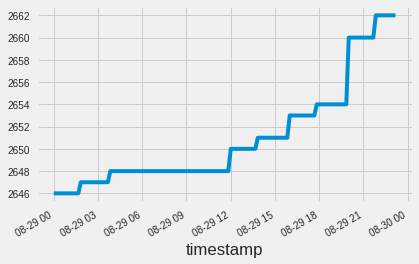

In [58]:
lastday=df['2017-08-29']
lastday[lastday.category=='IMDb users'].respondents.plot()

In [59]:
# the last timestamp/ row/ 
df.tail(1)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final =df.tail(1)

In [0]:
columns=['1_pct', '2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct',]
data = final[columns].T


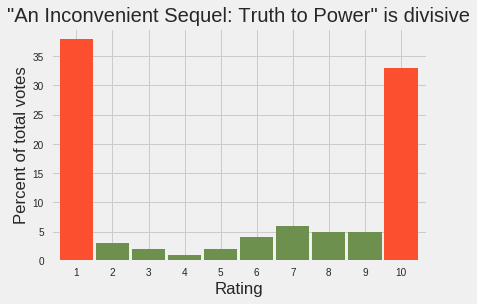

In [62]:
data=fake

#data.plot.bar()
colors=['C1','C3','C3','C3','C3','C3','C3','C3','C3','C1']

ax = data.plot.bar(color=colors, width=0.92, legend=False)

ax.tick_params(labelrotation=0) # rotate the x labels

#  define the title 
#ax.set_title('Xxx')
ax.set(title='"An Inconvenient Sequel: Truth to Power" is divisive', 
       xlabel='Rating', 
       ylabel='Percent of total votes');

In [63]:
#Aprint(fake)
fake.head()
data.head()

1    38
2     3
3     2
4     1
5     2
dtype: int64

# Explanatory Visualization  :  my assignment



###  Try out Altair and Reproduce this Chart:
#### Altair’s main purpose is to convert plot specifications to a JSON string that conforms to the Vega-Lite schema
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))



In [64]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/11/hickey-side-dish-1.png?w=575'
example = Image(url=url, width=400)

display(example)

###Get the data into pandas
from https://github.com/fivethirtyeight/data/blob/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv

In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_url='https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'      
df=pd.read_csv(data_url)

pd.options.display.max_columns=None
df.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Whic

In [66]:
df.sample(1).T

,964
RespondentID,4335992074
Do you celebrate Thanksgiving?,Yes
What is typically the main dish at your Thanksgiving dinner?,Turkey
What is typically the main dish at your Thanksgiving dinner? - Other (please specify),NaN
How is the main dish typically cooked?,Roasted
How is the main dish typically cooked? - Other (please specify),NaN
What kind of stuffing/dressing do you typically have?,Bread-based
What kind of stuffing/dressing do you typically have? - Other (please specify),NaN
What type of cranberry saucedo you typically have?,None
What type of cranberry saucedo you typically have? - Other (please specify),NaN


### Plot a  Chloropleth Map
 (maps where the color of each shape is based on the value of an associated variable)

In [67]:
# Altair’s main purpose is to convert plot specifications to a JSON string
# that conforms to the Vega-Lite schema
import altair as alt

#  vega lite sample datasets lib
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')

#df = pd.read_json(data.us_10m.url)

print(states)

print(data.us_10m.url)


UrlData({
  format: TopoDataFormat({
    feature: 'states',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})
https://vega.github.io/vega-datasets/data/us-10m.json


In [68]:
#  print a chloropleth

alt.Chart(states).mark_geoshape().encode(
).project(
    type='albersUsa'
).properties(
    width=800,
    height=600)



Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    
  }),
  height: 600,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  width: 800
})

In [69]:

counties = alt.topo_feature(data.us_10m.url, 'counties')
unemp_data = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)


Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'counties',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'rate:Q'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data: 'https://vega.github.io/vega-datasets/data/unemployment.tsv',
      fields: ['rate'],
      key: 'id'
    }),
    lookup: 'id'
  })],
  width: 500
})

In [70]:
states = alt.topo_feature(data.us_10m.url, 'states')

pop_eng_hur_url = data.population_engineers_hurricanes.url
pop_eng_hur_df= pd.read_csv(pop_eng_hur_url)

pop_eng_hur_df



,state,id,population,engineers,hurricanes
0,Alabama,1,4863300,0.003422,22
1,Alaska,2,741894,0.001591,0
2,Arizona,4,6931071,0.004774,0
3,Arkansas,5,2988248,0.002440,0
4,California,6,39250017,0.007126,0
5,Colorado,8,5540545,0.008088,0
6,Connecticut,9,3576452,0.005897,10
7,Delaware,10,952065,0.004989,2
8,District of Columbia,11,681170,0.011759,0
9,Florida,12,20612439,0.003300,110


In [71]:
variable_list = ['state']


print(states)

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='nominal')

).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop_eng_hur_df, 'id', variable_list)


).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

UrlData({
  format: TopoDataFormat({
    feature: 'states',
    type: 'topojson'
  }),
  url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
})


RepeatChart({
  repeat: Repeat({
    row: ['state']
  }),
  resolve: Resolve({
    scale: ScaleResolveMap({
      color: 'independent'
    })
  }),
  spec: Chart({
    data: UrlData({
      format: TopoDataFormat({
        feature: 'states',
        type: 'topojson'
      }),
      url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
    }),
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: RepeatRef({
          repeat: 'row'
        }),
        type: 'nominal'
      })
    }),
    height: 300,
    mark: 'geoshape',
    projection: Projection({
      type: 'albersUsa'
    }),
    transform: [LookupTransform({
      from: LookupData({
        data:                    state  id  population  engineers  hurricanes
        0                Alabama   1     4863300   0.003422          22
        1                 Alaska   2      741894   0.001591           0
        2                Arizona   4     6931071   0.004774           0
        3               Arkansas   5     2988248   0.002440           0
        4             California   6    39250017   0.007126           0
        5               Colorado   8     5540545   0.008088           0
        6            Connecticut   9     3576452   0.005897          10
        7               Delaware  10      952065   0.004989           2
        8   District of Columbia  11      681170   0.011759           0
        9                Florida  12    20612439   0.003300         110
        10               Georgia  13    10310371   0.004940          20
        11                Hawaii  15     1428557   0.001624           0
        12                 Idaho  16     1683140   0.002971           0
        13              Illinois  17    12801539   0.004478           0
        14               Indiana  18     6633053   0.002724           0
        15                  Iowa  19     3134693   0.003716           0
        16                Kansas  20     2907289   0.003811           0
        17              Kentucky  21     4436974   0.002089           0
        18             Louisiana  22     4681666   0.001177          49
        19                 Maine  23     1331479   0.002291           6
        20              Maryland  24     6016447   0.006291           2
        21         Massachusetts  25     6811779   0.010231          10
        22              Michigan  26     9928300   0.003877           0
        23             Minnesota  27     5519952   0.006194           0
        24           Mississippi  28     2988726   0.000934          15
        25              Missouri  29     6093000   0.004413           0
        26               Montana  30     1042520   0.002139           0
        27              Nebraska  31     1907116   0.005621           0
        28                Nevada  32     2940058   0.002037           0
        29         New Hampshire  33     1334795   0.006331           2
        30            New Jersey  34     8944469   0.007724           2
        31            New Mexico  35     2081015   0.001884           0
        32              New York  36    19745289   0.004941          12
        33        North Carolina  37    10146788   0.004227          46
        34          North Dakota  38      757952   0.003404           0
        35                  Ohio  39    11614373   0.004096           0
        36              Oklahoma  40     3923561   0.002286           0
        37                Oregon  41     4093465   0.005457           0
        38          Pennsylvania  42    12784227   0.004237           1
        39          Rhode Island  44     1056426   0.004581           9
        40        South Carolina  45     4961119   0.002084          31
        41          South Dakota  46      865454   0.003085           0
        42             Tennessee  47     6651194   0.002376           0
        43                 Texas  48    27862596   0.004320          59
        44                  Utah  49     3051217   0.006440           0
        

In [72]:
variable_list = ['population']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')

).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop_eng_hur_df, 'id', variable_list)


).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

RepeatChart({
  repeat: Repeat({
    row: ['population']
  }),
  resolve: Resolve({
    scale: ScaleResolveMap({
      color: 'independent'
    })
  }),
  spec: Chart({
    data: UrlData({
      format: TopoDataFormat({
        feature: 'states',
        type: 'topojson'
      }),
      url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
    }),
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: RepeatRef({
          repeat: 'row'
        }),
        type: 'quantitative'
      })
    }),
    height: 300,
    mark: 'geoshape',
    projection: Projection({
      type: 'albersUsa'
    }),
    transform: [LookupTransform({
      from: LookupData({
        data:                    state  id  population  engineers  hurricanes
        0                Alabama   1     4863300   0.003422          22
        1                 Alaska   2      741894   0.001591           0
        2                Arizona   4     6931071   0.004774           0
        3               Arkansas   5     2988248   0.002440           0
        4             California   6    39250017   0.007126           0
        5               Colorado   8     5540545   0.008088           0
        6            Connecticut   9     3576452   0.005897          10
        7               Delaware  10      952065   0.004989           2
        8   District of Columbia  11      681170   0.011759           0
        9                Florida  12    20612439   0.003300         110
        10               Georgia  13    10310371   0.004940          20
        11                Hawaii  15     1428557   0.001624           0
        12                 Idaho  16     1683140   0.002971           0
        13              Illinois  17    12801539   0.004478           0
        14               Indiana  18     6633053   0.002724           0
        15                  Iowa  19     3134693   0.003716           0
        16                Kansas  20     2907289   0.003811           0
        17              Kentucky  21     4436974   0.002089           0
        18             Louisiana  22     4681666   0.001177          49
        19                 Maine  23     1331479   0.002291           6
        20              Maryland  24     6016447   0.006291           2
        21         Massachusetts  25     6811779   0.010231          10
        22              Michigan  26     9928300   0.003877           0
        23             Minnesota  27     5519952   0.006194           0
        24           Mississippi  28     2988726   0.000934          15
        25              Missouri  29     6093000   0.004413           0
        26               Montana  30     1042520   0.002139           0
        27              Nebraska  31     1907116   0.005621           0
        28                Nevada  32     2940058   0.002037           0
        29         New Hampshire  33     1334795   0.006331           2
        30            New Jersey  34     8944469   0.007724           2
        31            New Mexico  35     2081015   0.001884           0
        32              New York  36    19745289   0.004941          12
        33        North Carolina  37    10146788   0.004227          46
        34          North Dakota  38      757952   0.003404           0
        35                  Ohio  39    11614373   0.004096           0
        36              Oklahoma  40     3923561   0.002286           0
        37                Oregon  41     4093465   0.005457           0
        38          Pennsylvania  42    12784227   0.004237           1
        39          Rhode Island  44     1056426   0.004581           9
        40        South Carolina  45     4961119   0.002084          31
        41          South Dakota  46      865454   0.003085           0
        42             Tennessee  47     6651194   0.002376           0
        43                 Texas  48    27862596   0.004320          59
        44                  Utah  49     3051217   0.006440           

###  GeoPandas  playground

- ([`GeoPandas`](http://geopandas.org/mapping.html))


In [73]:
#  install geopandas 
!pip install geopandas
!pip install descartes

    100% |████████████████████████████████| 901kB 6.4MB/s 
    100% |████████████████████████████████| 4.4MB 5.3MB/s 
    100% |████████████████████████████████| 17.9MB 1.2MB/s 
    100% |████████████████████████████████| 1.5MB 15.1MB/s 
    100% |████████████████████████████████| 81kB 24.9MB/s 
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/89/77/ec/a537585d1022dafde0317dd19d33c4a30d4ee61e19f25ebd8e
  Running setup.py bdist_wheel for munch ... - done
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d

In [74]:
# create maps by using the plot() method on a GeoSeries or GeoDataFrame.

import geopandas

# create GeoDataFrames
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# Examine country GeoDataFrame
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


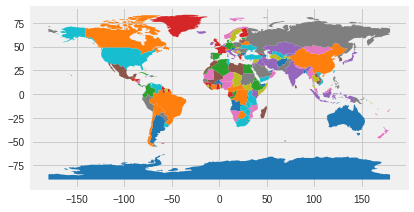

In [75]:
# basic plot
world.plot(column='iso_a3');

In [76]:
# Check original projection
# (it's Platte Carre! x-y are long and lat)
world.crs


{'init': 'epsg:4326'}

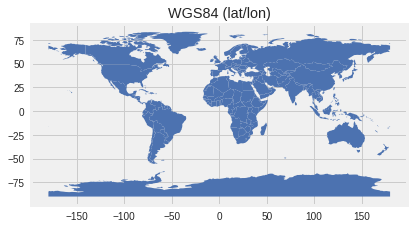

In [77]:
# Visualize
ax = world.plot()
ax.set_title("WGS84 (lat/lon)");

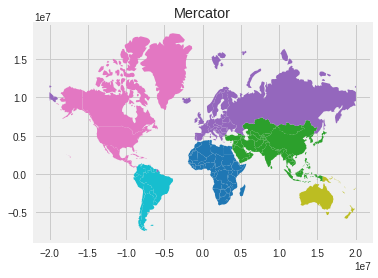

In [78]:
# Reproject to Mercator (after dropping Antartica)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.to_crs({'init': 'epsg:3395'}) # world.to_crs(epsg=3395) would also work
ax = world.plot(column='continent')
ax.set_title("Mercator");

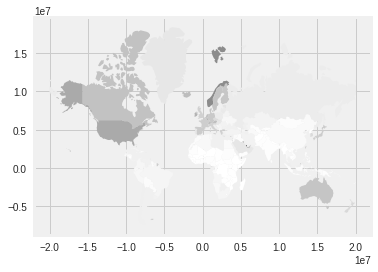

In [79]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap');

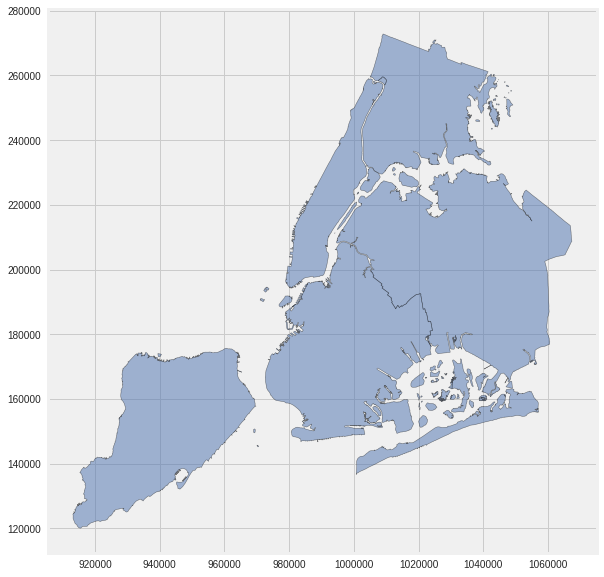

In [80]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
#Web map tiles are typically provided in Web Mercator (EPSG 3857), so we need to make sure to convert our data first to the same CRS to combine our polygons and background tiles in the same map:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [0]:
# Web map tiles are typically provided in Web Mercator (EPSG 3857),
# so we need to make sure to convert our data first to the same CRS
# to combine our polygons and background tiles in the same map:

df = df.to_crs(epsg=3857)

In [82]:
!pip install geos
!pip install cython
!pip install contextily 
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

    100% |████████████████████████████████| 368kB 6.7MB/s 
    100% |████████████████████████████████| 92kB 9.3MB/s 
    100% |████████████████████████████████| 5.8MB 6.2MB/s 
    100% |████████████████████████████████| 2.1MB 9.8MB/s 
    100% |████████████████████████████████| 8.8MB 3.7MB/s 
    Complete output from command python setup.py egg_info:
    /tmp/pip-install-ozmk9e5w/cartopy/setup.py:178: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
    Proj4 4.9.0 must be installed.
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-ozmk9e5w/cartopy/


ModuleNotFoundError: ignored